In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv("Gold data.csv")
data= data.loc[:, ~data.columns.str.contains('^Unnamed')]
data=data.set_index('Date')

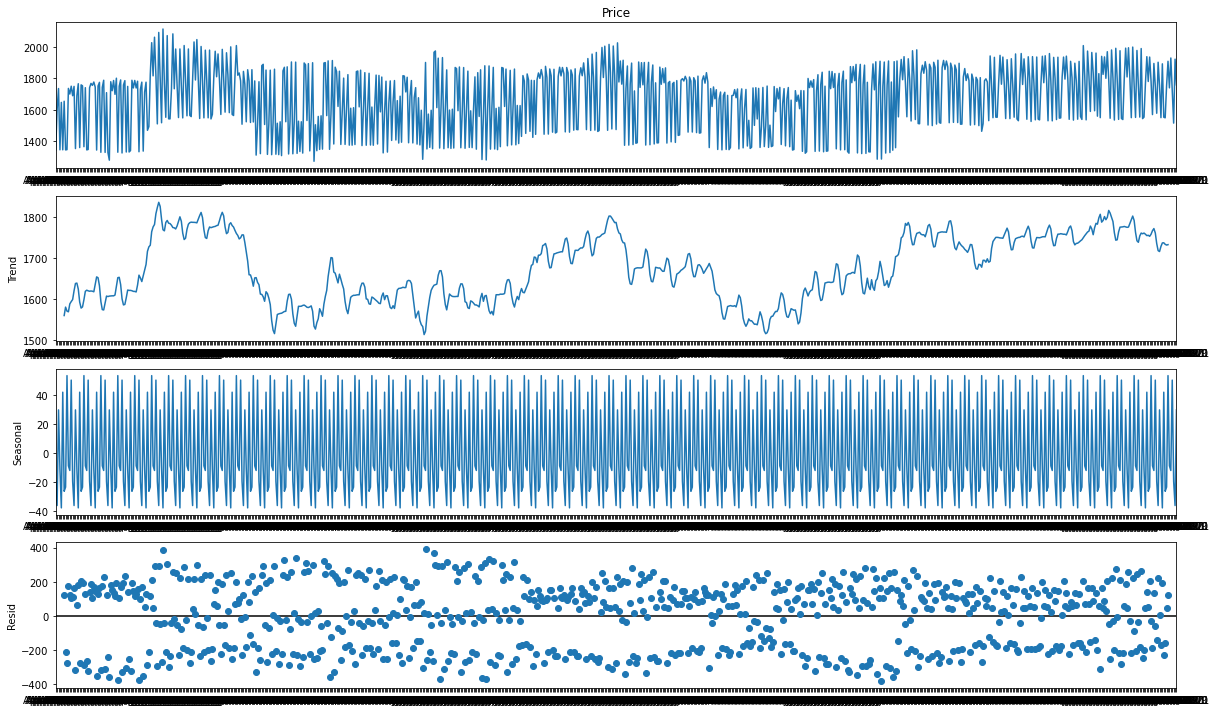

In [4]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib

df1=data.sort_values(by='Date', ascending=True)
matplotlib.rc('figure', figsize=(17, 10))
decompose = seasonal_decompose(df1.Price, period=12, model='additive')
decompose.plot()
plt.show() 

In [5]:
data

,Price
Date,
"Dec 06, 2018",1310.20
"Dec 07, 2018",1319.50
"Dec 10, 2018",1314.80
"Dec 11, 2018",1312.90
"Dec 12, 2018",1315.80
...,...
"Dec 01, 2021",1784.30
"Dec 02, 2021",1762.70
"Dec 03, 2021",1783.90


In [6]:
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

In [7]:
X = data.values
X = X.astype('float32')

In [8]:
model = ARIMA(X, order=(0,1,0))
model_fit = model.fit()

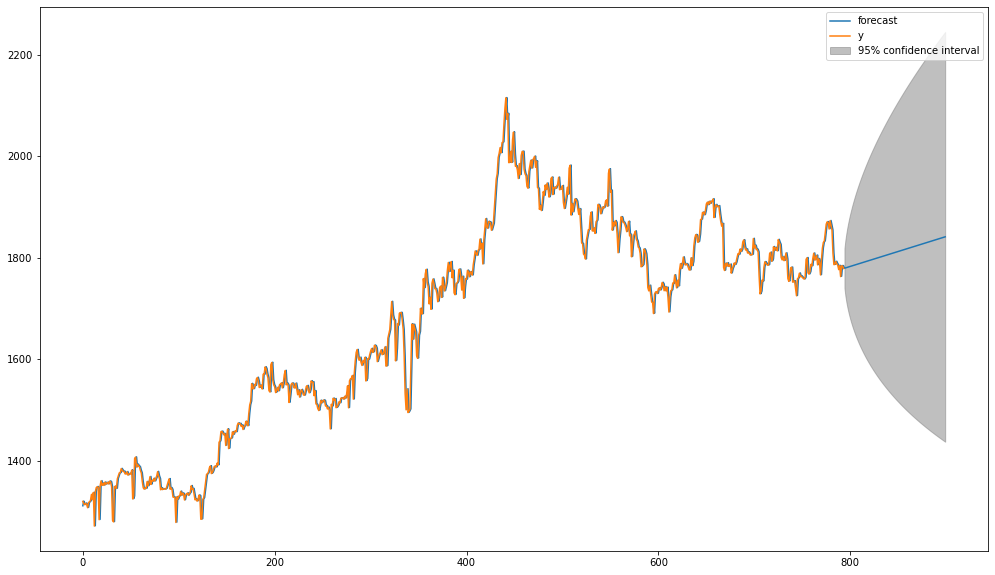

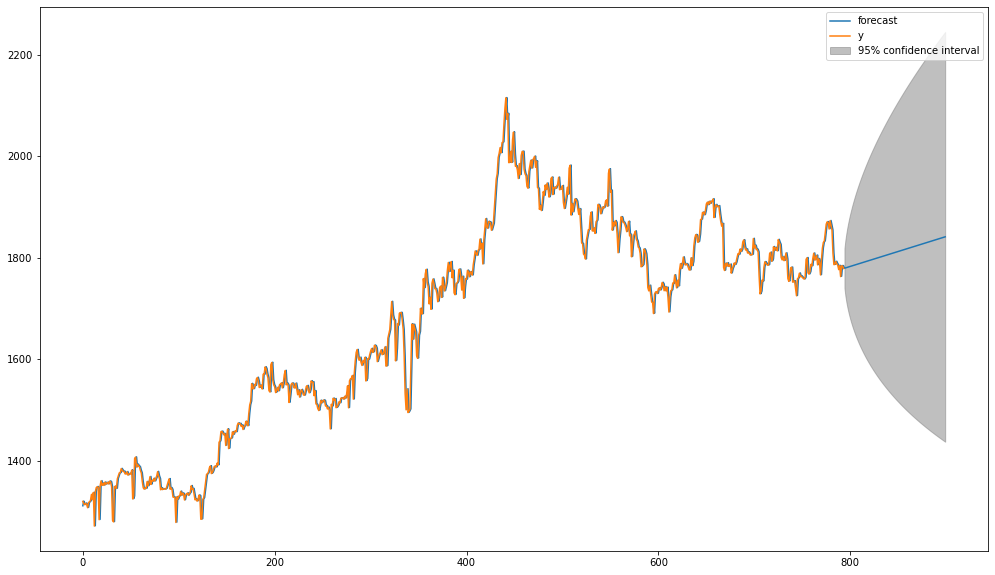

In [9]:
forecast=model_fit.forecast(steps=10)[0]
model_fit.plot_predict(1,900)

In [10]:
forecast

array([1779.24001191, 1779.82999941, 1780.41998691, 1781.00997441,
       1781.5999619 , 1782.1899494 , 1782.7799369 , 1783.3699244 ,
       1783.95991189, 1784.54989939])

In [11]:
# saving the model 
import pickle 
pickle_out = open("classifier.pkl", mode = "wb") 
pickle.dump(model, pickle_out) 
pickle_out.close()

In [12]:
%%writefile for.py
 
import pickle
import streamlit as st
import pandas as pd
import numpy as np
import time
import datetime
import requests


from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

data = pd.read_csv("Gold data.csv")
data= data.loc[:, ~data.columns.str.contains('^Unnamed')]
data=data.set_index('Date')



def prediction():   
    

    prediction = classifier.predict( [[]])
            
 


    #****************************#
   
      
  
    # this is the main function in which we define our webpage  
def main():       
    # front end elements of the web page 
    html_temp = """ 
    <div style ="background-color:Grey;padding:13px"> 
    <h1 style ="color:black;text-align:center;">GOLD PRICE PREDCTION</h1> 
    </div> 
    """
      
    # display the front end aspect
    st.markdown(html_temp, unsafe_allow_html = True) 
    


    
    
    
    
   
    
    
    
    
    
    
    #****PREDICT************#
    st.header('Predict Gold Price')
    col1, col2 = st.columns([1,3])
    with col1:
        Kidhome = st.number_input("Enter Number of Days for Prediction", value= 1, step=1)
    
        X = data.values
        X = X.astype('float32')
    
        model = ARIMA(X, order=(0,1,0))
        model_fit = model.fit()
        forecast=model_fit.forecast(steps=Kidhome)[0]
        prediction=pd.DataFrame(forecast,columns=['Predicted Price'])
        st.dataframe(prediction, height=250)
    with col2:
        st.subheader('Gold Predicted Rate Graph  ')
        st.line_chart(prediction)
    
    

    
    
 
        
        
if __name__=='__main__': 
    main()


Overwriting for.py
